In [1]:
import sqlite3
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
''')


data = [
    ('Apple', 10, 1.2),
    ('Banana', 15, 0.5),
    ('Orange', 12, 0.8),
    ('Apple', 8, 1.2),
    ('Banana', 10, 0.5),
    ('Orange', 20, 0.8)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", data)
conn.commit()
conn.close()


Sales Summary:
   product  total_qty  revenue
0   Apple         18     21.6
1  Banana         25     12.5
2  Orange         32     25.6


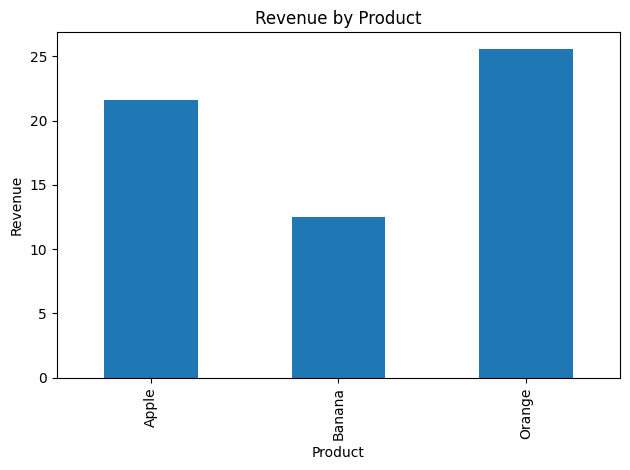

<Figure size 640x480 with 0 Axes>

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


conn = sqlite3.connect("sales_data.db")


query = '''
SELECT product,
       SUM(quantity) AS total_qty,
       ROUND(SUM(quantity * price), 2) AS revenue
FROM sales
GROUP BY product
'''
df = pd.read_sql_query(query, conn)


print("Sales Summary:\n", df)


df.plot(kind='bar', x='product', y='revenue', title='Revenue by Product', legend=False)
plt.ylabel('Revenue')
plt.xlabel('Product')
plt.tight_layout()
plt.show()

plt.savefig("sales_chart.png")

conn.close()


In [3]:
from google.colab import files
files.download("sales_chart.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>